<a href="https://colab.research.google.com/github/Jiiahhhh/Belajar_TensorFlow/blob/master/01_nn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01. Neural Network Regression with TensorFlow


Ada banyak definisi untuk masalah [regresi](https://en.wikipedia.org/wiki/Regression_analysis) tetapi dalam kasus kita, kita akan menyederhanakannya menjadi: memprediksi sebuah angka.

Sebagai contoh, mungkin Anda ingin:

* Memprediksi harga jual rumah berdasarkan informasi tentangnya (seperti jumlah kamar, ukuran, jumlah kamar mandi).
* Memprediksi koordinat sebuah kotak pembatas dari sebuah item dalam sebuah gambar.
* Memprediksi biaya asuransi kesehatan untuk seorang individu berdasarkan demografis mereka (usia, jenis kelamin, ras).

Dalam notebook ini, kita akan menetapkan dasar untuk bagaimana Anda bisa mengambil sampel input (ini adalah data Anda), membangun jaringan saraf untuk menemukan pola dalam input tersebut, dan kemudian membuat prediksi (dalam bentuk angka) berdasarkan input tersebut.

##What we're going to cover
Secara khusus, kita akan melalui langkah-langkah berikut dengan TensorFlow:

* Arsitektur dari model regresi
* Bentuk input dan output
    * `X`: fitur/data (input)
    * `y`: label (output)
* Membuat data kustom untuk melihat dan cocokkan
* Langkah-langkah dalam pemodelan
    * Membuat sebuah model
    * Mengompilasi sebuah model
        * Mendefinisikan loss function
        * Menyiapkan optimizer
        * Membuat metrik evaluasi
    * Memfitting sebuah model (mendapatkan model untuk menemukan pola dalam data kita)
* Mengevaluasi sebuah model
    * Memvisualisasikan model ("visualisasikan, visualisasikan, visualisasikan")
    * Melihat kurva pelatihan
    * Membandingkan prediksi dengan kebenaran dasar (menggunakan metrik evaluasi kita)
* Menyimpan sebuah model (sehingga kita bisa menggunakannya nanti)
* Memuat sebuah model

Jangan khawatir jika tidak ada yang masuk akal sekarang, kita akan menjelaskan setiap langkahnya.

##Typical architecture of a regression neural network

Kata "typical" disengaja.

Mengapa?

Karena ada banyak cara yang berbeda (sebenarnya, hampir ada jumlah tak terbatas) untuk menulis neural network.

Tetapi berikut adalah pengaturan umum untuk memproses sekelompok angka, menemukan pola di dalamnya, dan kemudian mengeluarkan jenis angka target tertentu.

Ya, kalimat sebelumnya memang kabur tetapi kita akan melihatnya dalam tindakan segera.

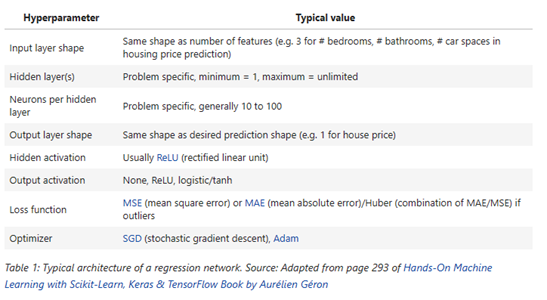

Sekali lagi, jika Anda baru mengenal neural network dan deep learning secara umum, sebagian besar tabel di atas mungkin tidak masuk akal. Tetapi jangan khawatir, kita akan segera menggunakan semuanya secara langsung.

> **🔑 Catatan**: Sebuah **hyperparameter** dalam pembelajaran mesin adalah sesuatu yang dapat diatur oleh seorang analis data atau pengembang, sedangkan **parameter** biasanya menggambarkan sesuatu yang dipelajari model secara otomatis (sebuah nilai yang tidak secara eksplisit diatur oleh seorang analis).

Baiklah, cukup bicara, mari kita mulai menulis kode.

Untuk menggunakan TensorFlow, kita akan mengimpornya dengan alias umum `tf` (singkatan dari TensorFlow).

In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-02-26 13:42:10.718969


##Creating data to view and fit
Karena kita sedang bekerja pada **masalah regresi** (memprediksi sebuah angka), mari buat beberapa data linear (sebuah garis lurus) untuk dimodelkan.

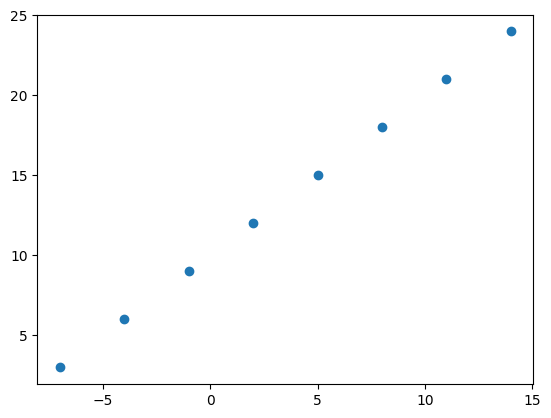

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualisasi
plt.scatter(X, y)

Sebelum kita melakukan pemodelan, apakah Anda bisa menghitung pola antara `X` dan `y`?

Misalnya, katakanlah saya menanyakan kepada Anda, berdasarkan data ini apa nilai `y` jika `X` adalah 17.0?

Atau bagaimana jika `X` adalah -10.0?

Jenis penemuan pola seperti ini adalah inti dari apa yang akan kita bangun neural network untuk lakukan bagi kita.

##Regression input shapes and output shapes
Salah satu konsep paling penting saat bekerja dengan neural network adalah bentuk input dan output.

**Input shape** adalah bentuk dari data Anda yang masuk ke dalam model.

**Output shape** adalah bentuk dari data yang Anda inginkan keluar dari model Anda.

Ini akan berbeda tergantung pada masalah yang sedang Anda kerjakan.

Jaringan saraf menerima angka dan menghasilkan angka. Angka-angka ini biasanya direpresentasikan sebagai tensor (atau array).

Sebelumnya, kita membuat data menggunakan array NumPy, tetapi kita juga bisa melakukannya dengan tensor.

In [3]:
# Contoh input dan output shape untuk model regresi
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

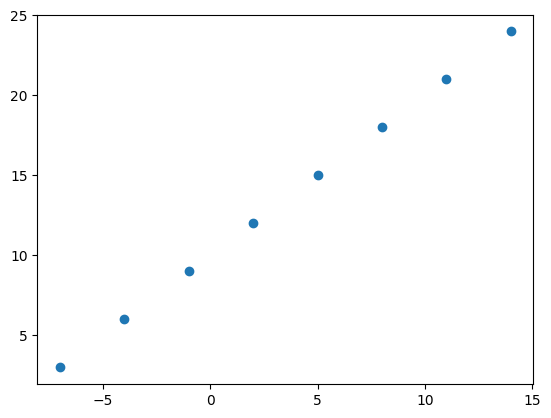

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Tujuan kita di sini adalah menggunakan `X` untuk memprediksi `y`.

Jadi **input** kita akan menjadi `X` dan **output** kita akan menjadi `y`.

Dengan mengetahui input dan output kita akan menjadi seperti apa?

Mari kita lihat.

In [6]:
input_shape = X[0].shape

output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

Hah?

Dari sini, sepertinya input dan output kita tidak memiliki bentuk?

Bagaimana bisa begitu?

Hal ini karena tidak peduli jenis data apa yang kita berikan kepada model kita, itu akan selalu mengambil sebagai input dan mengembalikan sebagai output suatu jenis tensor.

Tetapi dalam kasus kita karena dataset kita (hanya 2 daftar kecil angka), kita melihat sebuah jenis tensor khusus, lebih spesifiknya sebuah tensor peringkat 0 atau sebuah skalar.

In [7]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

Dalam kasus kita, kita mencoba membangun sebuah model untuk memprediksi pola antara `X[0]` yang sama dengan `-7.0` dan `y[0]` yang sama dengan `3.0`.

Jadi sekarang kita mendapatkan jawabannya, kita mencoba menggunakan 1 nilai `X` untuk memprediksi 1 nilai `y`.

Anda mungkin berpikir, "ini tampak cukup rumit hanya untuk memprediksi sebuah garis lurus...".

Dan Anda benar.

Tetapi konsep-konsep yang kita bahas di sini, konsep bentuk input dan output ke sebuah model, adalah fundamental.

Sebenarnya, hal ini adalah hal yang akan memakan waktu kita cukup banyak dalam mengerjakan neural network: **memastikan input dan output kita memiliki shape yang benar**

Jika ini tidak masuk akal sekarang, kita akan melihat banyak contoh lainnya nanti (segera Anda akan menyadari bahwa bentuk input dan output dapat menjadi hampir apa pun yang bisa Anda bayangkan).

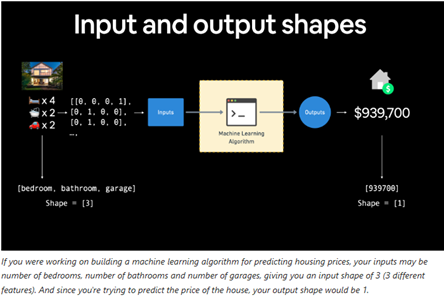

##Steps in modelling with TensorFlow
Sekarang kita tahu data yang kita miliki serta bentuk input dan output, mari kita lihat bagaimana kita akan membangun sebuah jaringan saraf untuk memodelkannya.

Di TensorFlow, biasanya ada 3 langkah mendasar untuk membuat dan melatih sebuah model.

1. **Membuat sebuah model** - menyusun lapisan-lapisan jaringan saraf sendiri (menggunakan API [Functional](https://www.tensorflow.org/guide/keras/functional_api) atau [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) atau mengimpor sebuah model yang telah dibangun sebelumnya (dikenal sebagai transfer learning).
2. **Mengompilasi sebuah model** - mendefinisikan bagaimana kinerja model harus diukur (loss/metrics) serta mendefinisikan bagaimana model tersebut harus diperbaiki (optimizer).
3. **Memfitting sebuah model** - memberi kesempatan pada model untuk mencari pola dalam data (bagaimana `X` menjadi `y`).

Mari kita lihat ini cara menggunakan [API Sequential Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) untuk membangun sebuah model untuk data regresi kita. Kemudian kita akan menjelajahi setiap langkahnya.

>**Catatan**: Jika Anda menggunakan [TensorFlow 2.7.0+](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0), fungsi `fit()` tidak lagi meningkatkan data input dari `(batch_size, )` menjadi `(batch_size, 1)`. Untuk memperbaiki ini, Anda perlu memperluas dimensi data input menggunakan `tf.expand_dims(input_data, axis=-1)`.
Dalam kasus kita, ini berarti daripada menggunakan `model.fit(X, y, epochs=5)`, gunakan `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [8]:
#Set random seed
tf.random.set_seed(42)

# Buat model pakai Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss = tf.keras.losses.mae, #mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 832ms/step - loss: 21.8298 - mae: 21.8298
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 21.4367 - mae: 21.4367
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 21.0436 - mae: 21.0436
Epoch 4/5
1/1 [==============================] - 0s 37ms/step - loss: 20.6504 - mae: 20.6504
Epoch 5/5
1/1 [==============================] - 0s 41ms/step - loss: 20.3095 - mae: 20.3095


Wow!

Kita baru saja melatih sebuah model untuk mencari pola antara `X` dan `y`.

Bagaimana menurutmu hasilnya?

In [9]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Menurutmu outputnya bakalan seperti apa kalau `X` = 17.0?

In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 211ms/step


array([[-23.607065]], dtype=float32)

Tidak berjalan dengan baik... seharusnya menghasilkan sesuatu yang mendekati 27.0.

>🤔 **Pertanyaan**: Apa itu Keras? Saya pikir kita sedang bekerja dengan TensorFlow tapi setiap kali kita menulis kode TensorFlow, `keras` muncul setelah `tf` (misalnya `tf.keras.layers.Dense()`)?

Sebelum TensorFlow 2.0+, Keras adalah sebuah API yang dirancang untuk membangun model pembelajaran mendalam dengan mudah. Sejak TensorFlow 2.0+, fungsionalitasnya telah terintegrasi secara ketat dalam perpustakaan TensorFlow.

##Improving a model
Bagaimana menurutmu kita bisa meningkatkan model kita saat ini?

Jika Anda menebak dengan menyelaraskan beberapa hal yang kita lakukan di atas, Anda benar.

Untuk meningkatkan model kita, kita mengubah hampir setiap bagian dari 3 langkah yang kita lakukan sebelumnya.

1. **Membuat sebuah model** - di sini Anda mungkin ingin menambahkan lebih banyak lapisan, meningkatkan jumlah unit tersembunyi (juga disebut neuron) dalam setiap lapisan, mengubah fungsi aktivasi dari setiap lapisan.
2. **Mengompilasi sebuah model** - Anda mungkin ingin memilih fungsi optimisasi atau mungkin mengubah **learning rate** dari optimization function.
3. **Memfitting sebuah model** - mungkin Anda bisa memfitting sebuah model untuk lebih banyak **epochs** (biarkan pelatihan berlangsung lebih lama) atau pada lebih banyak data (berikan model lebih banyak contoh untuk dipelajari).

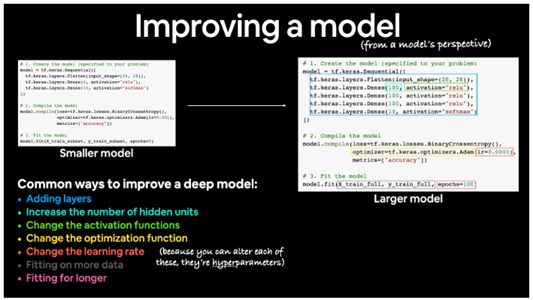

*Ada banyak cara yang berbeda untuk potensial meningkatkan sebuah jaringan saraf. Beberapa yang paling umum termasuk: meningkatkan jumlah layers (membuat jaringan lebih dalam), meningkatkan jumlah hidden units (membuat jaringan lebih lebar), dan mengubah learning rate. Karena nilai-nilai ini dapat diubah oleh manusia, mereka disebut sebagai hiperparameter) dan praktik mencoba menemukan hiperparameter terbaik disebut sebagai penyetelan hiperparameter.*

Wow. Kita baru saja memperkenalkan beberapa langkah yang mungkin. Hal penting yang perlu diingat adalah bagaimana Anda mengubah setiap langkah ini akan bergantung pada masalah yang sedang Anda kerjakan.

Dan hal baiknya adalah, dalam beberapa masalah berikutnya, kita akan melakukan secara langsung dengan semua itu.

Untuk saat ini, mari kita tetap sederhana, yang kita lakukan hanya melatih model kita lebih lama (semuanya akan tetap sama).

In [11]:
#set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Epochnya yang diperbanyak sekarang
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 639ms/step - loss: 21.6122 - mae: 21.6122
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 21.2191 - mae: 21.2191
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 20.8260 - mae: 20.8260
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 20.4586 - mae: 20.4586
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 20.1774 - mae: 20.1774
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 19.8961 - mae: 19.8961
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 19.6149 - mae: 19.6149
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 19.3336 - mae: 19.3336
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 19.0524 - mae: 19.0524
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 18.7711 - mae: 18.7711
Epoch 11/100
1/1 [==============================

Anda mungkin telah melihat loss value berkurang dari sebelumnya (dan terus berkurang saat jumlah epochs semakin tinggi).

Apa pendapat Anda tentang apa artinya ini ketika kita membuat prediksi dengan model kita?

Bagaimana jika kita mencoba memprediksi pada 17.0 lagi?

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 95ms/step


array([[29.142262]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

##Evaluating a model
Sebuah alur kerja yang tipikal yang akan Anda lalui saat membangun jaringan saraf adalah:

Build a model -> evaluate it -> build (tweak) a model -> evalaute it -> build (tweak) a model -> evaluate it...

###Visualisasikan, visualisasikan, visualisasikan

Ketika masuk evaluasi, anda harus ingat kata: "visualisasikan, visualisasikan, visualisasikan."

Hal ini karena Anda mungkin lebih baik melihat sesuatu (bertindak) daripada hanya sekedar membayangkannya.

Ide bagus untuk memvisualisasikan:

1. **Data** - data apa yang Anda kerjakan? Seperti apa bentuknya?
2. **Model itu sendiri** - bagaimana arsitektur model tersebut? Apa saja bentuk-bentuknya?
3. **Pelatihan sebuah model** - bagaimana kinerja sebuah model saat belajar?
4. **Prediksi sebuah model** - bagaimana prediksi sebuah model sejajar dengan kebenaran dasar (label asli)?

Mari kita mulai dengan memvisualisasikan model.

Tetapi sebelumnya, kita akan membuat sebuah dataset yang sedikit lebih besar dan sebuah model baru yang dapat kita gunakan (akan sama seperti sebelumnya, tetapi semakin banyak latihan semakin baik).

In [14]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [15]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Sejak `y = X + 10`, kita bisa buat label seperti ini

In [16]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

##Split data into training/test set
Salah satu langkah paling umum dan penting lainnya dalam sebuah proyek machine learning adalah membuat training dan testing set (dan jika diperlukan, sebuah validation set).

Setiap set memiliki tujuan spesifik:

1. **Training set** - model belajar dari data ini, yang biasanya merupakan 70-80% dari total data yang tersedia (seperti materi kursus yang Anda pelajari selama semester).
2. **Validation set** - model disesuaikan dengan data ini, yang biasanya merupakan 10-15% dari total data yang tersedia (seperti ujian praktik yang Anda ambil sebelum ujian akhir).
3. **Testing set** - model dievaluasi pada data ini untuk menguji apa yang telah dipelajarinya, biasanya merupakan 10-15% dari total data yang tersedia (seperti ujian akhir yang Anda ambil di akhir semester).

Untuk saat ini, kita akan menggunakan hanya set pelatihan dan set pengujian, ini berarti kita akan memiliki sebuah dataset untuk model kita belajar serta dievaluasi.

Kita dapat membuatnya dengan memisahkan array `X` dan `y` kita.

>🔑 **Catatan:** Saat berurusan dengan data dunia nyata, langkah ini biasanya dilakukan tepat pada awal proyek (set pengujian harus selalu dijaga terpisah dari semua data lainnya). Kita ingin model kita belajar pada data pelatihan dan kemudian mengevaluasinya pada data pengujian untuk mendapatkan indikasi seberapa baik ia **umumnya** untuk contoh-contoh yang tidak terlihat sebelumnya.

In [17]:
len(X)

50

In [18]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

##Visualizing the data
Sekarang kita sudah punya data training dan data testing, ide bagus untuk memvisualisasikannya.

Mari kita gambarkan dengan beberapa warna yang bagus untuk membedakannya.

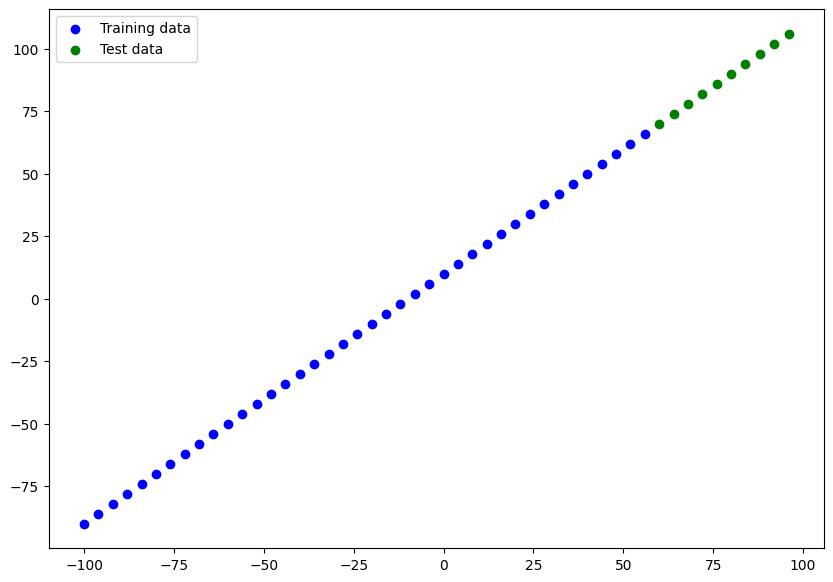

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Test data")
plt.legend()

Indah sekali! Setiap kali Anda dapat memvisualisasikan data Anda, model Anda, atau apa pun, itu ide yang bagus.

Dengan grafik ini diingat, apa yang akan kita coba lakukan adalah membangun sebuah model yang belajar pola dalam titik-titik biru (`X_train`) untuk menggambar titik-titik hijau (`X_test`).

##Visualizing the model
Setelah Anda membangun sebuah model, Anda mungkin ingin melihatnya (terutama jika Anda belum membangun banyak model sebelumnya).

Anda dapat melihat lapisan-lapisan dan bentuk-bentuk model Anda dengan memanggil `summary()` padanya.

> 🔑 **Catatan**: Memvisualisasikan sebuah model sangat membantu ketika Anda menemui ketidakcocokan bentuk input dan output.

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) #define input_shape to our model
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Memanggil `summary()` pada model kita menunjukkan kepada kita isi layer dari model kita, bentuk output, dan jumlah parameter.

* **Total params** - total jumlah parameter dalam model.
* **Parameter yang dapat dilatih** - ini adalah parameter (pola) yang dapat diperbarui model saat melatih.
* **Parameter yang tidak dapat dilatih** - parameter-parameter ini tidak diperbarui selama pelatihan (ini umumnya terjadi saat Anda membawa pola yang sudah dipelajari dari model lain selama transfer learning).

> 📖 **Sumber**: Untuk gambaran yang lebih mendalam tentang parameter-parameter yang dapat dilatih dalam sebuah lapisan, periksa [video pengenalan deep learning dari MIT](https://www.youtube.com/watch?v=njKP3FqW3Sk).

>🛠 **Latihan**: Cobalah bermain-main dengan jumlah unit tersembunyi dalam lapisan `Dense` (misalnya `Dense(2)`, `Dense(3)`). Bagaimana ini mengubah Total/Trainable params? Investigasikan apa yang menyebabkan perubahan tersebut.

Untuk saat ini, yang perlu Anda pikirkan tentang parameter-parameter ini adalah bahwa mereka adalah pola-pola yang dapat dipelajari dalam data.

Mari kita latih model kita pada data pelatihan.

In [23]:
model.fit(X_train, y_train, epochs=100, verbose=0) #verbose control berapa banyak outputnya

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Selain summary, anda bisa memvisualisasikannya juga menggunakan 2D plot pakai plot_model()

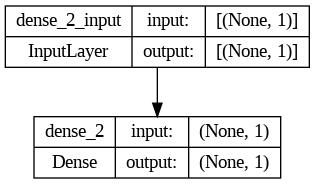

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

Dalam kasus kita, model yang kita gunakan hanya memiliki sebuah input dan sebuah output tetapi memvisualisasikan model yang lebih rumit bisa sangat membantu untuk debugging.

###Latihan
Cobalah bermain-main dengan jumlah unit tersembunyi dalam lapisan `Dense` (misalnya `Dense(2)`, `Dense(3)`). Bagaimana ini mengubah Total/Trainable params? Investigasikan apa yang menyebabkan perubahan tersebut.

In [26]:
# Dense(2)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=[1])
])

model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

model2.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 44.1177 - mae: 44.1177
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 29.6923 - mae: 29.6923
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 20.8192 - mae: 20.8192
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5613 - mae: 11.5613
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 8.4787 - mae: 8.4787
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 8.0622 - mae: 8.0622
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 7.7889 - mae: 7.7889
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 7.6315 - mae: 7.6315
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 8.6564 - mae: 8.6564
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 9.4907 - mae: 9.4907
Epoch 11/100
2/2 [==============================] - 0s 11ms/s

In [27]:
# Dense(3)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

model2.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 34.1469 - mae: 34.1469
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 29.6895 - mae: 29.6895
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 26.0423 - mae: 26.0423
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 21.6603 - mae: 21.6603
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 17.9542 - mae: 17.9542
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 13.8630 - mae: 13.8630
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 10.8064 - mae: 10.8064
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 7.9109 - mae: 7.9109
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 8.7326 - mae: 8.7326
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 8.5591 - mae: 8.5591
Epoch 11/100
2/2 [==============================] - 0s 2

##Visualizing the predictions
Sekarang kita punya sebuah model yang telah dilatih, mari kita visualisasikan beberapa prediksinya.

Untuk memvisualisasikan prediksi, selalu ide yang baik untuk memplotnya terhadap label kebenaran dasar.

Seringkali Anda akan melihat ini dalam bentuk `y_test` vs. `y_pred` (kebenaran dasar vs. prediksi).

Pertama, kita akan membuat beberapa prediksi pada data pengujian (`X_test`), ingatlah bahwa model tidak pernah melihat data pengujian sebelumnya.

In [28]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 84ms/step


In [29]:
y_preds

array([[56.593174],
       [60.278053],
       [63.962933],
       [67.64781 ],
       [71.33269 ],
       [75.01757 ],
       [78.702446],
       [82.38732 ],
       [86.072205],
       [89.75708 ]], dtype=float32)

Baiklah, kita mendapatkan daftar angka tetapi bagaimana cara membandingkannya dengan ground truth labelnya?

Mari kita bangun sebuah fungsi plotting untuk mencari tahu.

>🔑 **Catatan**: Jika Anda berpikir Anda akan sering memvisualisasikan sesuatu, itu ide bagus untuk membuatnya menjadi sebuah fungsi sehingga Anda bisa menggunakannya nanti.

In [30]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=y_preds):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label="Training data")
    plt.scatter(test_data, test_labels, c='g', label="Test data")
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend()

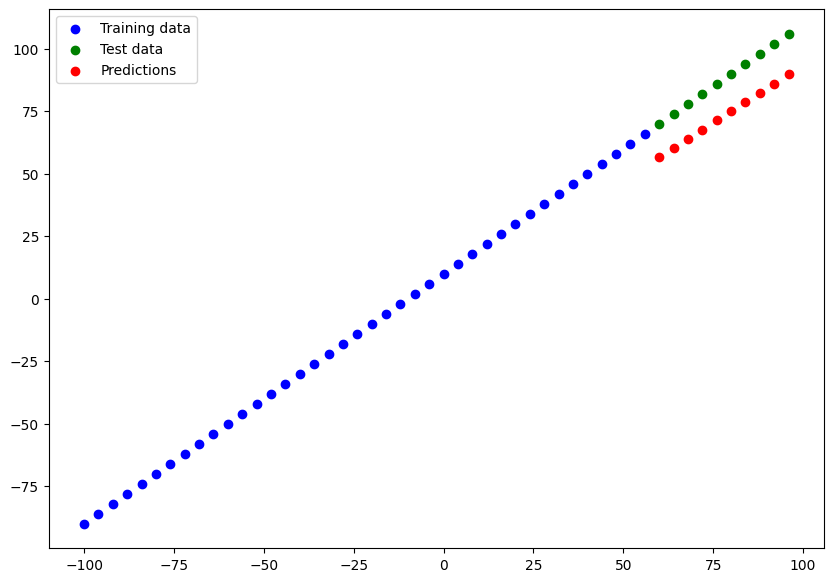

In [31]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

Dari plot tersebut, kita bisa melihat bahwa prediksi kita tidak benar-benar aneh tetapi mereka juga tidak istimewa.

##Evaluating predictions
Selain visualisasi, metrik evaluasi adalah pilihan terbaik bagi Anda untuk mengevaluasi model Anda.

Tergantung pada masalah yang Anda kerjakan, model yang berbeda memiliki metrik evaluasi yang berbeda.

Dua dari metrik utama yang digunakan untuk masalah regresi adalah:

1. **Mean absolute error (MAE)** - rata-rata perbedaan antara setiap prediksi.
2. **Mean squared error (MSE)** - rata-rata perbedaan kuadrat antara prediksi (digunakan jika kesalahan yang lebih besar lebih merugikan daripada kesalahan yang lebih kecil).

Semakin rendah nilai-nilai ini, semakin baik.

Anda juga dapat menggunakan `model.evaluate()` yang akan mengembalikan loss model serta metrik apa pun yang diatur selama langkah compile.

In [32]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 695ms/step - loss: 14.8249 - mae: 14.8249


[14.824872016906738, 14.824872016906738]

Dalam kasus kita, karena kita menggunakan MAE untuk fungsi kerugian serta MAE untuk metrik, `model.evaluate()` mengembalikan keduanya.

TensorFlow juga memiliki fungsi bawaan untuk MSE dan MAE.

Untuk banyak fungsi evaluasi, premisnya sama: membandingkan prediksi dengan ground truth labels.

In [33]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.406826, 27.721949, 24.037067, 20.352188, 16.93385 , 14.189458,
       12.119021, 10.722536, 10.      , 10.      ], dtype=float32)>

Huh? Aneh, MAE harusnya hanya memunculkan 1 output saja.

Kita malah dapat 10 output.

Ini karena tensor `y_test` dan `y_preds` kita memiliki shapes yang berbeda.

In [34]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [35]:
y_preds

array([[56.593174],
       [60.278053],
       [63.962933],
       [67.64781 ],
       [71.33269 ],
       [75.01757 ],
       [78.702446],
       [82.38732 ],
       [86.072205],
       [89.75708 ]], dtype=float32)

In [36]:
y_test.shape, y_preds.shape

((10,), (10, 1))

Tentu, seperti yang telah dibahas sebelumnya, menangani bentuk input dan output yang berbeda adalah salah satu masalah paling umum yang akan Anda temui, dan ini adalah salah satu contohnya.

Tapi jangan khawatir.

Kita dapat memperbaikinya menggunakan `squeeze()`, ini akan menghapus dimensi `1` dari tensor `y_preds` kita, membuatnya memiliki bentuk yang sama dengan `y_test`.

>🔑 **Catatan**: Jika Anda membandingkan dua tensor, penting untuk memastikan bahwa mereka memiliki bentuk yang benar (Anda tidak selalu harus memanipulasi bentuknya, tetapi selalu waspada, banyak kesalahan adalah hasil dari tensor yang tidak cocok, terutama bentuk input dan output yang tidak cocok).

In [37]:
y_preds.shape

(10, 1)

In [38]:
y_preds.squeeze().shape

(10,)

In [39]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([56.593174, 60.278053, 63.962933, 67.64781 , 71.33269 , 75.01757 ,
        78.702446, 82.38732 , 86.072205, 89.75708 ], dtype=float32))

Baiklah, sekarang kita tahu cara membuat tensor `y_test` dan `y_preds` kita memiliki bentuk yang sama, mari gunakan metrik evaluasi kita.

In [40]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.824872>

In [41]:
mse = tf.metrics.mean_squared_error(y_test, y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=220.59607>

Kita juga bisa menghitung MAE pakai function dari TensorFlow

In [42]:
# cara pakai tensorflow untuk hitung MAE
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=14.824871826171876>

Dan akan lebih bagus buat membuat function pada hal yang bersifat repetitif seperti menghitung mae dan mse

In [43]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, y_pred)

##Running experiments to improve a model

Setelah melihat metrik evaluasi dan prediksi yang dilakukan oleh model Anda, kemungkinan besar Anda akan ingin meningkatkannya.

Sekali lagi, ada banyak cara yang berbeda untuk melakukan ini, tetapi 3 dari yang utama adalah:

1. **Mendapatkan lebih banyak data** - mendapatkan lebih banyak contoh untuk model Anda berlatih (lebih banyak peluang untuk mempelajari pola).
2. **Membuat model Anda lebih besar (menggunakan model yang lebih kompleks)** - ini mungkin datang dalam bentuk lebih banyak lapisan atau lebih banyak unit tersembunyi dalam setiap lapisan.
3. **Melatih lebih lama** - memberi model Anda lebih banyak kesempatan untuk menemukan pola dalam data.

Karena kita membuat dataset kita sendiri, kita bisa dengan mudah membuat lebih banyak data tetapi ini tidak selalu terjadi ketika Anda bekerja dengan dataset dunia nyata.

Jadi mari kita lihat bagaimana kita bisa meningkatkan model kita menggunakan 2 dan 3.

Untuk melakukannya, kita akan membangun 3 model dan membandingkan hasilnya:

1. `model_1` - sama seperti model asli, 1 lapisan, dilatih selama 100 epochs.
2. `model_2` - 2 lapisan, dilatih selama 100 epochs.
3. `model_3` - 2 lapisan, dilatih selama 500 epochs.

###Build `model_1`

In [44]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 8.4978 - mae: 8.4978
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3050 - mae: 10.3050
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 10.6656 - mae: 10.6656
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5595 - mae: 9.5595
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4687 - mae: 10.4687
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6944 - mae: 9.6944
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.7905 - mae: 8.7905
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0579 - mae: 9.0579
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.3120 - mae: 19.3120
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4224 - mae: 10.4224
Epoch 11/100
2/2 [==============================] - 0s 8ms/step -

1/1 [==============================] - 0s 56ms/step


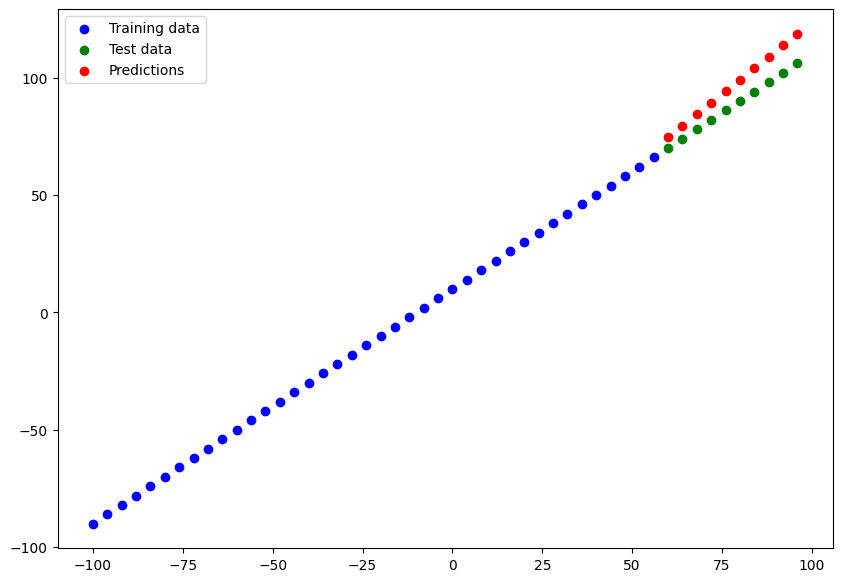

In [45]:
y_preds1 = model1.predict(X_test)
plot_predictions(predictions=y_preds1)

In [46]:
mae1=mae(y_test, y_preds1.squeeze()).numpy()
mse1=mse(y_test, y_preds1.squeeze()).numpy()
mae1, mse1

(8.65503, 81.43169)

###Build `model_2`
Kali ini dengan extra dense layer (model akan punya 2 layer) dan sisanya tetap sama.

In [47]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 110.0063 - mae: 110.0063
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 36.1559 - mae: 36.1559
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1256 - mae: 12.1256
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.0929 - mae: 14.0929
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 13.5408 - mae: 13.5408
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8767 - mae: 10.8767
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8306 - mae: 11.8306
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7723 - mae: 10.7723
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 36.5164 - mae: 36.5164
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 24.3354 - mae: 24.3354
Epoch 11/100
2/2 [==============================] - 0s 7

1/1 [==============================] - 0s 56ms/step


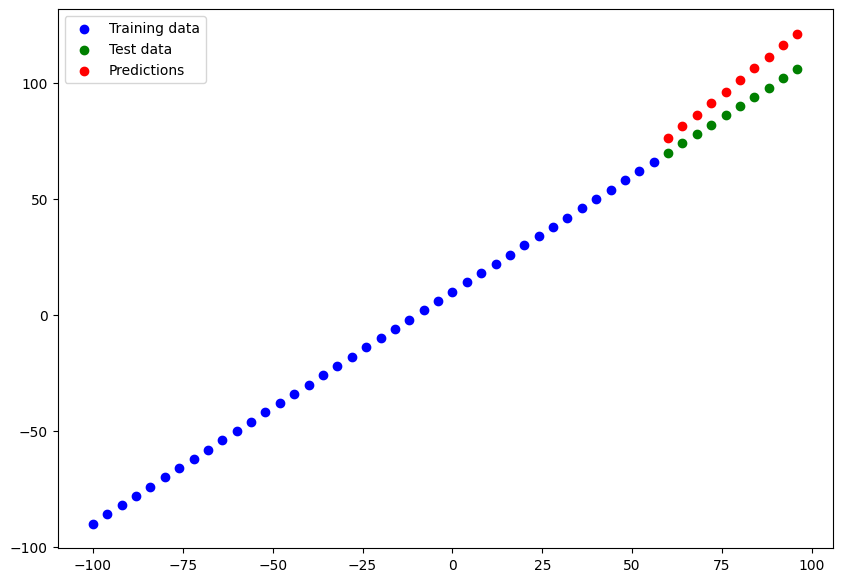

In [48]:
y_preds2 = model2.predict(X_test)
plot_predictions(predictions=y_preds2)

In [49]:
mae2 = mae(y_test, y_preds2.squeeze()).numpy()
mse2 = mse(y_test, y_preds2.squeeze()).numpy()
mae2, mse2

(10.797799, 124.4882)

###Build `model_3`
model3 sama seperti model_2 hanya saja epochnya dibuat jadi 500x

Hal ini akan membuat model mempunyai kesempatan lebih banyak untuk mempelajari data

In [50]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 19.7316 - mae: 19.7316
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 21.2823 - mae: 21.2823
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 28.0878 - mae: 28.0878
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 24.0269 - mae: 24.0269
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 14.2858 - mae: 14.2858
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.3980 - mae: 11.3980
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 12.4116 - mae: 12.4116
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.9432 - mae: 10.9432
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.6015 - mae: 38.6015
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 26.0919 - mae: 26.0919
Epoch 11/500
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 98ms/step


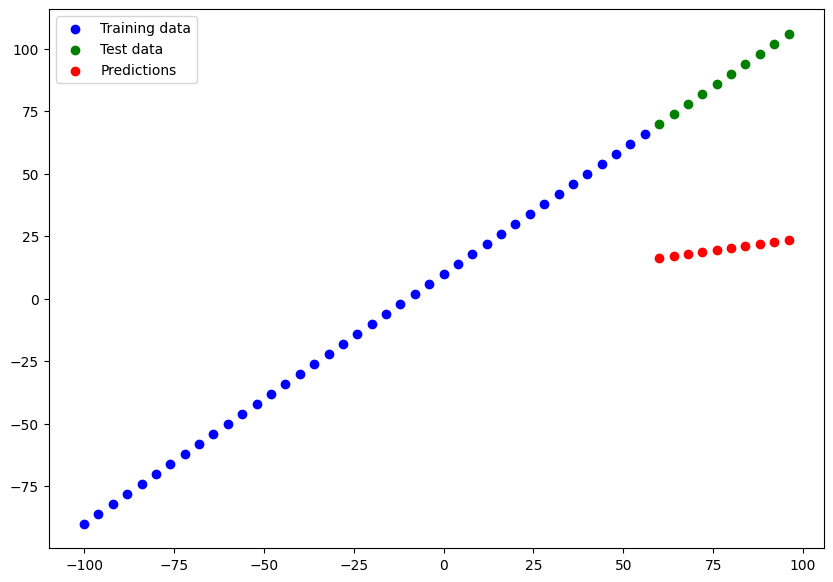

In [51]:
y_preds3 = model3.predict(X_test)
plot_predictions(predictions=y_preds3)

In [52]:
mae3 = mae(y_test, y_preds3.squeeze()).numpy()
mse3 = mse(y_test, y_preds3.squeeze()).numpy()
mae3, mse3

(67.95047, 4701.7993)

##Comparing results
ayo kita bandingkan hasil dari 3 model tadi

In [53]:
model_results = [["model1", mae1, mse1],
                 ["model2", mae2, mse2],
                 ["model3", mae3, mse3]]

In [54]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model1,8.655030,81.431686
1,model2,10.797799,124.488197
2,model3,67.950470,4701.799316


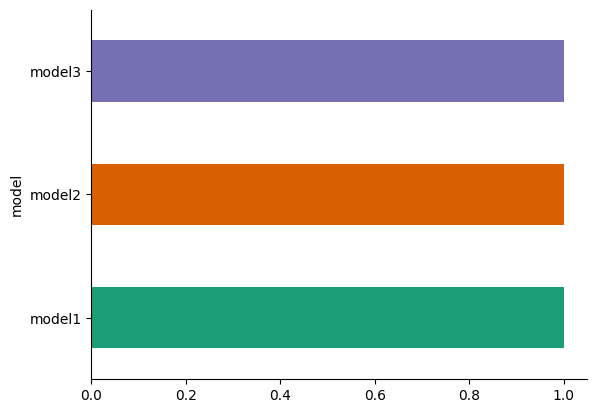

In [55]:
# @title model

from matplotlib import pyplot as plt
import seaborn as sns
all_results.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dari eksperimen kita, terlihat bahwa `model_2` memiliki kinerja terbaik.

Dan sekarang, Anda mungkin berpikir, "wow, membandingkan model itu melelahkan..." dan memang bisa, kita hanya membandingkan 3 model di sini.

Tetapi ini adalah bagian dari apa yang disebut pemodelan pembelajaran mesin, mencoba banyak kombinasi model dan melihat mana yang memberikan kinerja terbaik.

Setiap model yang Anda bangun adalah sebuah eksperimen kecil.

>🔑 **Catatan**: Salah satu tujuan utama Anda haruslah meminimalkan waktu antara eksperimen Anda. Semakin banyak eksperimen yang Anda lakukan, semakin banyak hal yang akan Anda temukan yang tidak berhasil dan pada gilirannya, semakin dekat Anda untuk mengetahui apa yang berhasil. Ingatlah motto praktisi pembelajaran mesin: "eksperimen, eksperimen, eksperimen".

Hal lain yang akan Anda temukan adalah apa yang Anda pikir akan berhasil (seperti melatih model lebih lama) mungkin tidak selalu berhasil dan yang tepat sebaliknya juga sering terjadi.